## 自己符号化器（Auntoencoder）

ここでは、Kerasを用いて、自己符号化器の学習を行う。  
[参考]  
https://blog.keras.io/building-autoencoders-in-keras.html

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

### MNISTデータの読み込み

In [ ]:
# Load the MNIST dataset
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()

# 28*28の画像データを784のベクトルに変換する
X_train = X_train.reshape(-1, 784) / 255
X_test = X_test.reshape(-1, 784) / 255

11501568/11490434 [==============================] - 0s 0us/step


### モデルの定義
モデルは入力層-中間層-出力層の構成とする。  
入力層-中間層がエンコーダ、中間層-出力層がデコーダになる。  
なお、ここでは、ノードの集まり層と呼んでいる。  

In [ ]:
# 中間層のノード数
encoding_dim = 36

# 入力層の定義
input_img = Input(shape=(784,)) 

# 入力層〜中間層を定義
encoded = Dense(encoding_dim, activation='relu')(input_img)

# 中間層〜出力層を定義
decoded = Dense(784, activation='sigmoid')(encoded)
# decoded = Dense(784, activation='linear')(encoded)
 
# 入力層〜中間層までをつなげて、ネットワークを完成させる
autoencoder = Model(inputs=input_img, outputs=decoded)

# 損失関数と最適化手法の定義
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
# autoencoder.compile(optimizer='adam', loss="mean_squared_error") 


# 計算結果を利用しやすくするために、以下のモデルを定義

# エンコーダ部分だけのモデルを定義
encoder = Model(inputs=input_img, outputs=encoded)

# デコーダ部分だけのモデルを定義
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1] # 中間層〜出力層
decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))

### 自己符号化器の訓練
自己符号化器を訓練する。入力データと正解データに同じデータを用いる。

Epoch 1/20
235/235 [==============================] - 3s 12ms/step - loss: 0.2687 - val_loss: 0.1833
Epoch 2/20
235/235 [==============================] - 3s 12ms/step - loss: 0.1658 - val_loss: 0.1498
Epoch 3/20
235/235 [==============================] - 3s 12ms/step - loss: 0.1401 - val_loss: 0.1294
Epoch 4/20
235/235 [==============================] - 3s 11ms/step - loss: 0.1236 - val_loss: 0.1161
Epoch 5/20
235/235 [==============================] - 3s 11ms/step - loss: 0.1130 - val_loss: 0.1082
Epoch 6/20
235/235 [==============================] - 3s 12ms/step - loss: 0.1059 - val_loss: 0.1020
Epoch 7/20
235/235 [==============================] - 3s 12ms/step - loss: 0.1008 - val_loss: 0.0975
Epoch 8/20
235/235 [==============================] - 3s 12ms/step - loss: 0.0970 - val_loss: 0.0943
Epoch 9/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0943 - val_loss: 0.0921
Epoch 10/20
235/235 [==============================] - 3s 12ms/step - loss: 0.0925 - val_lo

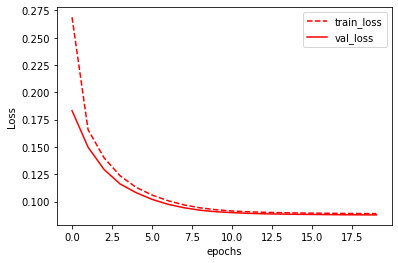

In [ ]:
history = autoencoder.fit(X_train, X_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

# 計算過程の描画
df_log = pd.DataFrame(history.history)
df_log.rename(columns={"loss":"train_loss"}, inplace=True)
df_log.plot(style=['r--', 'r-'])
plt.ylabel("Loss")
plt.xlabel("epochs")
plt.show()

### テストデータを入力し、中間層と出力層の値を得る
encoderとdecoderはautoencoderと連動しているので、中間層と出力層の値を個別に得ることができる。

In [ ]:
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)
# decoded_imgs = autoencoder.predict(X_test) #としても同じ

### 結果の可視化
matplotlibを使って結果を可視化する。

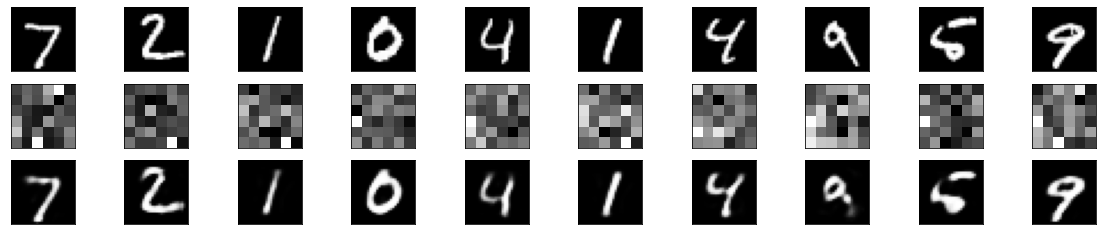

In [ ]:
# 表示させる画像の枚数
n = 10  

plt.figure(figsize=(20, 4))
for i in range(n):
    # 元画像
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 中間層の出力値
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(6,6)) #画像サイズは、encoding_dimに合わせて変更する
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # 出力層の出力値(復元画像)
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### [演習]
* Epoch数を減らすと再構成画像がどうなるか確認してみましょう。
* 中間層のノード数を減らすと再構成画像がどうなるか確認してみましょう。
* 通し課題における自己符号化器の活用方法を考えてみましょう。